Beta: [ 0.56757134 -1.36620924]
Beta Std Error: [0.46534254 0.71647031]
Beta Covariance: [[ 0.35640424 -0.54429536]
 [-0.54429536  0.8448775 ]]
Residual Variance: 0.607578846867905
Inverse Condition #: 0.0525723451417018
Reason(s) for Halting:
  Sum of squares convergence


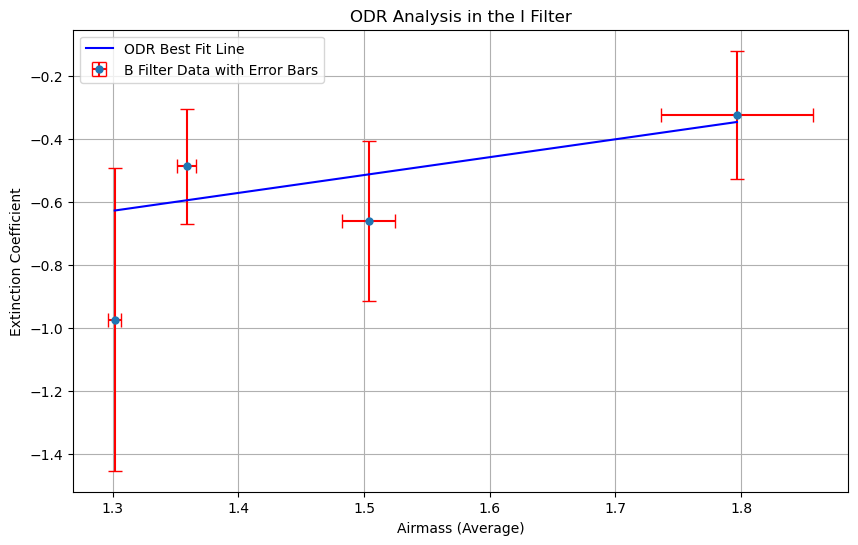

In [1]:
import pandas as pd
from scipy.odr import ODR, Model, Data, RealData
import matplotlib.pyplot as plt
import numpy as np

# Replace this with the path to your B filter CSV file
file_path = "/Users/jonathan.a.chavez9/Desktop/greatBasinFilterCalibration/SA 98/iFilterCoeff.csv"

# Load CSV data with the correct delimiter
df_i = pd.read_csv(file_path, delimiter='\t')


# Preparing ODR data
x = df_i['Airmass (Average)']
y = df_i['Extinction Coefficient']
x_err = df_i['Airmass Error']
y_err = df_i['Error']

# Define the linear model function
def linear_func(p, x):
    m, c = p
    return m * x + c

# Initialize model
linear_model = Model(linear_func)
data = RealData(x, y, sx=x_err, sy=y_err)

# Estimate initial slope using numpy polyfit
initial_slope = np.polyfit(x, y, 1)[0]
odr = ODR(data, linear_model, beta0=[initial_slope, np.mean(y - initial_slope * x)])

# Run the ODR
out = odr.run()
out.pprint()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='red', capsize=5, markersize=5, label='B Filter Data with Error Bars')
plt.plot(x, out.beta[0] * x + out.beta[1], 'b-', label='ODR Best Fit Line')
plt.xlabel('Airmass (Average)')
plt.ylabel('Extinction Coefficient')
plt.title('ODR Analysis in the I Filter')
plt.legend()
plt.grid(True)
plt.show()



Beta: [ 0.56757134 -1.36620924]
Beta Std Error: [0.46534254 0.71647031]
Beta Covariance: [[ 0.35640424 -0.54429536]
 [-0.54429536  0.8448775 ]]
Residual Variance: 0.607578846867905
Inverse Condition #: 0.0525723451417018
Reason(s) for Halting:
  Sum of squares convergence
Y-intercept (Zero Point Value): -1.3662092429657682
Standard Error of the Intercept: 0.7164703056231956


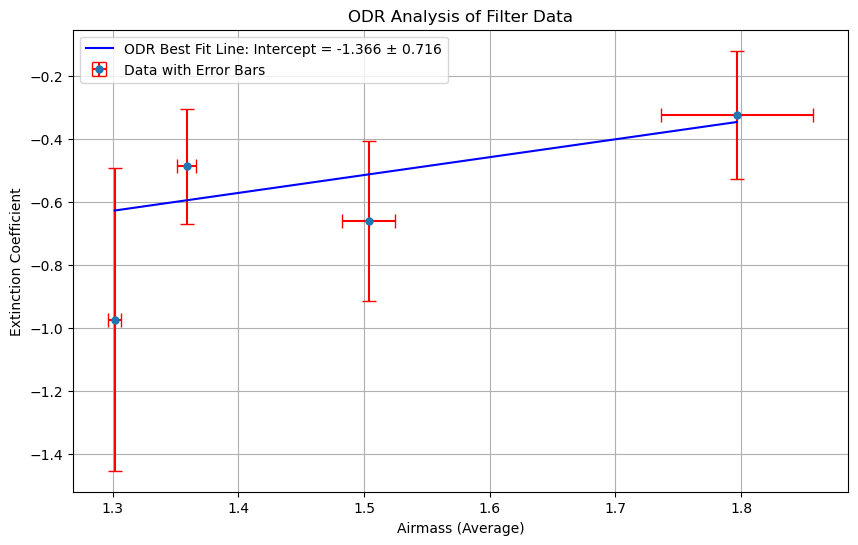

In [2]:
# Run the ODR
out = odr.run()
out.pprint()

# Extract the intercept and its error
intercept = out.beta[1]
intercept_error = out.sd_beta[1]
print("Y-intercept (Zero Point Value):", intercept)
print("Standard Error of the Intercept:", intercept_error)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='red', capsize=5, markersize=5, label='Data with Error Bars')
plt.plot(x, out.beta[0] * x + out.beta[1], 'b-', label=f'ODR Best Fit Line: Intercept = {intercept:.3f} ± {intercept_error:.3f}')
plt.xlabel('Airmass (Average)')
plt.ylabel('Extinction Coefficient')
plt.title('ODR Analysis of Filter Data')
plt.legend()
plt.grid(True)
plt.show()
